#### ACTUALLY SEE SCRIPT INSTEAD


In [1]:
# Useful starting lines
%timeit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from preprocessing import *
from train_tune import *
from proj1_helpers import *
#import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2
print("::: LOADING DATA :::\n")
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)
names= get_feature_names(DATA_TRAIN_PATH)
name2num,num2name = mapping(DATA_TRAIN_PATH)
#Train preprocessing
tx0, y0, tx1, y1, tx2, y2, tx3, y3, id0, id1, id2, id3 = cluster_preprocessing_train(tx_train,y,num2name)

::: LOADING DATA :::

PREPROCESSING TRAIN DATA 
 Clustering w.r.t. to PRI_jet_num numbers
Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

REMOVING LAST COL for TX0
Taking the log of the following features : 
 ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_met_sumet']
Removing features with all -999 rows. Returning indices for later
10 features deleted
7 features deleted
0 features deleted
0 features deleted
Replacing -999 values with mean
Standardizing : Setting mean to 0 and variance to 1
Preprocessing done


XD

In [41]:
from train_tune import crossval_regulog_gridsearch_adaptive
degrees = [1,2,3,4]
lambdas = np.logspace(-9,-5,3)
gammas = [1e-6, 5e-8, 8e-10, 1e-11]
k_fold = 5
n_iters = 1389
print("#======== CV for Cluster 0 ========#")
wlog0, dlog0, la0, train0, test0 = crossval_regulog_gridsearch_adaptive(y0,tx0,k_fold,
                                                             lambdas,degrees,gammas,
                                                             n_iters,loss=True,tol=1e-8)
cv_viz(dlog0,lambdas,train0[dlog0-1,:],test0[dlog0-1,:],save=False)

#======== CV for Cluster 0 ========#
Iterating. Testing 3 lambdas for current degree = 3
newlambda
newlambda
newlambda
Getting best degree and lambda
ReguLog regression : getting optimal weights with best degree (3), lambda (1e-07)
Done, returning optimal weight, degree, lambda 
 And train and test loss arrays for visualization


IndexError: index 2 is out of bounds for axis 0 with size 1

0.5804953591514554


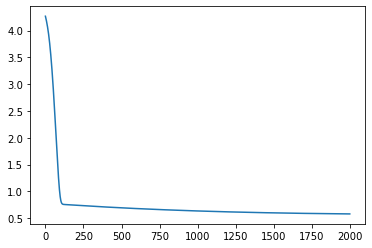

In [39]:
tx0_try2 = build_poly(tx0,2)
w_init_0 = np.random.randn(tx0_try.shape[1],1)
_, _, losses_try0_2 = reg_logistic_regression(y0,tx0_try,2e-7,w_init_0,2000,3.4e-8,1e-8)
plt.plot(losses_try0_2)
print(losses_try0_2[-1])

0.5983475156105513


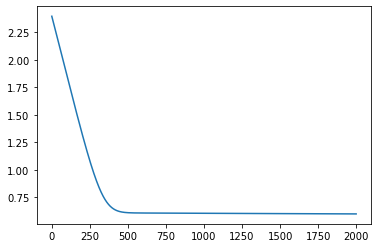

In [40]:
tx0_try3 = build_poly(tx0,3)
w_init_0 = np.random.randn(tx0_try.shape[1],1)
_, _, losses_try0_3 = reg_logistic_regression(y0,tx0_try,2e-7,w_init_0,2000,3.4e-9,1e-8)
tx0_try5 = build_poly(tx0,5)
w_init_0 = np.random.randn(tx0_try.shape[1],1)
_, _, losses_try0_5 = reg_logistic_regression(y0,tx0_try,2e-6,w_init_0,2000,1e-9,1e-8)
plt.plot(losses_try0_3)
print(losses_try0_3[-1])

0.8748403366280629


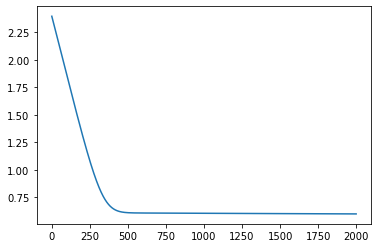

In [46]:
%t
tx0_try5 = build_poly(tx0,5)
w_init_0 = np.random.randn(tx0_try.shape[1],1)
_, _, losses_try0_5 = reg_logistic_regression(y0,tx0_try,2e-6,w_init_0,2000,1e-9,1e-8)
plt.plot(losses_try0_3)
print(losses_try0_5[-1])

[2.9523754793814283,
 2.8999811534703883,
 2.846918066044038,
 2.7932432637144644,
 2.7390166091842016,
 2.684299148033061,
 2.629151056925485,
 2.5736295477981135,
 2.517787077221902,
 2.4616700998495316,
 2.405318485388085,
 2.3487655885076486,
 2.292038789935427,
 2.2351603344944744,
 2.1781485150273023,
 2.121019188216928,
 2.0637874063356834,
 2.0064687748320766,
 1.949079447591796,
 1.8916338942249102,
 1.8341421215467129,
 1.7766105382903385,
 1.7190483051526448,
 1.661473666951883,
 1.603913199461738,
 1.5463965247541773,
 1.4889554938859058,
 1.4316350086853682,
 1.3744943519843913,
 1.3175769988687007,
 1.2609503199365282,
 1.2047285737572062,
 1.1490108926041944,
 1.0938986732632383,
 1.039646927053402,
 0.9865736225305858,
 0.9354788346496593,
 0.8903533934547884,
 0.8546871832652557,
 0.8289051060562924,
 0.8111387272658545,
 0.7989962656804881,
 0.7906571927106394,
 0.7848229112286303,
 0.7806371577036955,
 0.7775452981212115,
 0.7751838231275797,
 0.7733144378455067,
 0.

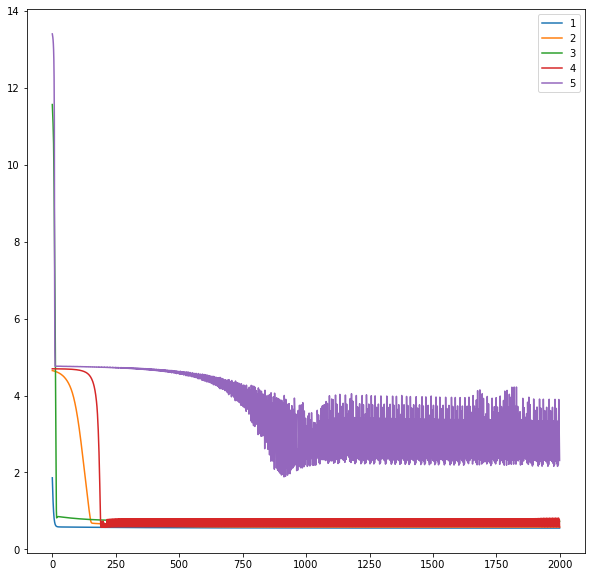

In [70]:
figure = plt.figure(figsize=(10,10))

tx0_try = build_poly(tx0,1)
tx0_try2 = build_poly(tx0,2)
tx0_try3 = build_poly(tx0,3)
tx0_try4 = build_poly(tx0,4)
tx0_try5 = build_poly(tx0,5)
w_init_0 = np.random.randn(tx0_try.shape[1],1)
w_init_2 = np.random.randn(tx0_try2.shape[1],1)
w_init_3 = np.random.randn(tx0_try3.shape[1],1)
w_init_4 = np.random.randn(tx0_try4.shape[1],1)
w_init_5 = np.random.randn(tx0_try5.shape[1],1)

_, _, losses_try0_1 = reg_logistic_regression(y0,tx0_try,2e-8,w_init_0,2000,3.4e-7,1e-8)
_, _, losses_try0_2 = reg_logistic_regression(y0,tx0_try2,2e-7,w_init_2,2000,3.4e-8,1e-8)
_, _, losses_try0_3 = reg_logistic_regression(y0,tx0_try3,2e-6,w_init_3,2000,3.4e-9,1e-8)
_, _, losses_try0_4 = reg_logistic_regression(y0,tx0_try4,2e-7,w_init_4,2000,5e-10,1e-8)
_, _, losses_try0_5 = reg_logistic_regression(y0,tx0_try5,2e-3,w_init_5,2000,1e-10,1e-8)

plt.plot(range(2000),losses_try0_1,label="1")
plt.plot(range(2000),losses_try0_2,label="2")
plt.plot(range(2000),losses_try0_3,label="3")
plt.plot(range(2000),losses_try0_4,label="4")
plt.plot(range(2000),losses_try0_5,label="5")

plt.legend()


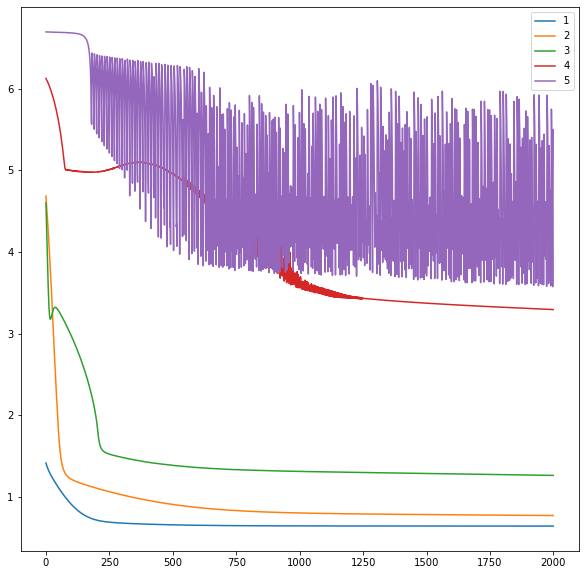

In [73]:
figure = plt.figure(figsize=(10,10))

tx1_try1 = build_poly(tx1,1)
tx1_try2 = build_poly(tx1,2)
tx1_try3 = build_poly(tx1,3)
tx1_try4 = build_poly(tx1,4)
tx1_try5 = build_poly(tx1,5)
w_init_0 = np.random.randn(tx1_try1.shape[1],1)
w_init_2 = np.random.randn(tx1_try2.shape[1],1)
w_init_3 = np.random.randn(tx1_try3.shape[1],1)
w_init_4 = np.random.randn(tx1_try4.shape[1],1)
w_init_5 = np.random.randn(tx1_try5.shape[1],1)

_, _, losses_try1_1 = reg_logistic_regression(y1,tx1_try1,2e-8,w_init_0,2000,3.4e-7,1e-8)
_, _, losses_try1_2 = reg_logistic_regression(y1,tx1_try2,2e-7,w_init_2,2000,3.4e-8,1e-8)
_, _, losses_try1_3 = reg_logistic_regression(y1,tx1_try3,2e-6,w_init_3,2000,3.4e-9,1e-8)
_, _, losses_try1_4 = reg_logistic_regression(y1,tx1_try4,2e-7,w_init_4,2000,5e-10,1e-8)
_, _, losses_try1_5 = reg_logistic_regression(y1,tx1_try5,2e-3,w_init_5,2000,1e-10,1e-8)

plt.plot(range(2000),losses_try1_1,label="1")
plt.plot(range(2000),losses_try1_2,label="2")
plt.plot(range(2000),losses_try1_3,label="3")
plt.plot(range(2000),losses_try1_4,label="4")
plt.plot(range(2000),losses_try1_5,label="5")

plt.legend()


In [4]:
degrees = [1,2,3,4]
lambdas = np.logspace(-9,-5,3)
gammas = [1e-6, 5e-8, 8e-10, 1e-11]
k_fold = 5
n_iters = 1200
gamma = 2e-6
print("#======== CV for Cluster 0 ========#")
wlog0, dlog0, la0, train0, test0 = crossval_regulog_gridsearch(y0,tx0,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True,tol=1e-6)
cv_viz(dlog0,lambdas,train0[dlog0-1,:],test0[dlog0-1,:],save=False)



#======== CV for Cluster 0 ========#
Iterating. Testing 3 lambdas for current degree = 2
newlambda
newlambda
newlambda
Iterating. Testing 3 lambdas for current degree = 4
newlambda
newlambda
newlambda
Iterating. Testing 3 lambdas for current degree = 6
newlambda
newlambda
newlambda
Getting best degree and lambda
ReguLog regression : getting optimal weights with best degree (2), lambda (3.162277660168379e-06)
Done, returning optimal weight, degree, lambda 
 And train and test loss arrays for visualization


In [4]:
#----------------1
print("#======== CV for Cluster 1 ========#")
wlog1, dlog1, la1, train1, test1 = crossval_regulog_gridsearch(y1,tx1,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True,tol=1e-6)
cv_viz(dlog1,lambdas,train1[dlog1-1,:],test0[dlog1-1,:],save=False)


In [4]:
#----------------2
print("#======== CV for Cluster 2 ========#")
wlog2, dlog2, la2, train2, test2 = crossval_regulog_gridsearch(y2,tx2,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True,tol=1e-6)
cv_viz(dlog2,lambdas,train2[dlog2-1,:],test0[dlog2-1,:],save="regulog_clust2final")

#----------------3
print("#======== CV for Cluster 3 ========#")
wlog3, dlog3, la3, train3, test3 = crossval_regulog_gridsearch(y3,tx3,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True,tol=1e-6)
cv_viz(dlog3,lambdas,train3[dlog3-1,:],test0[dlog3-1,:],save="regulog_clust3final")

In [4]:
degs=[dlog0,dlog1,dlog2,dlog3]

In [14]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../submissions/' # TODO: fill in desired name of output file for submission

test0, i0, test1, i1, test2, i2, test3, i3 = cluster_preprocessing_test(tX_test, id0, id1,
                                                                 id2, id3, degs, num2name)
#Prediction

yclusterpred_log = cluster_predict(w_log_opt0,w_log_opt1,w_log_opt2,w_log_opt3,
                               test0,test1,test2,test3,
                               i0,i1,i2,i3,how="log")

create_csv_submission(ids_test, yclusterpred_log, OUTPUT_PATH+"clusterREGULOG_postcrossval_final.csv")

PREPROCESSING TEST DATA 
 Clustering w.r.t. to PRI_jet_num numbers
No targets detected. Using a test-set. 
 Returning clusterized dataset and indices. 

REMOVING LAST COL for TX0
Taking the log of the following features : 
 [None, None, None, None, None, None, None, None, None, None]
deleting corresponding columns
Replacing -999 values with mean
Standardizing : Setting mean to 0 and variance to 1
Augmenting features
Preprocessing done, returning clusterized test set and indices
Prediction for log regression
